In [1]:
import pandas as pd 
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data_path = './result/weater_taxi_jun.csv'

In [3]:
df = pd.read_csv(data_path)

# Data preparition 

In [4]:
# Data preparation, remove outliers 
df = df[df['trip_time']>5]
df = df[df['rate']<5]
df = df[df['total_amount']<200]
df['rate'] = abs(df['rate'])
df['total_amount'] = abs(df['total_amount'])
df.shape

(5552946, 16)

In [5]:
boxplot = df.boxplot(column=['rate'])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8fb6f78630>]],
      dtype=object)

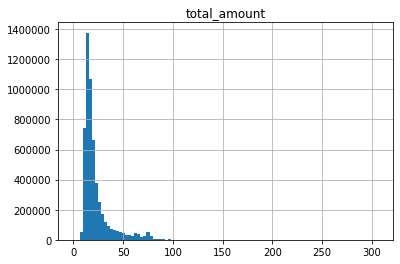

In [6]:
 df.hist(column=['total_amount'],bins=100)

In [7]:
total_amount = df['total_amount']
total_amount_sorted = np.sort(total_amount)

In [8]:
total_amount_sorted[int(len(total_amount)*0.85)]

30.8

In [9]:
# four categories (0-10,10-20,20-30,30+)
label = []
for amount in total_amount:
    if amount<10:
        label.append(0)
    elif amount<20:
        label.append(1)
    elif amount<30:
        label.append(2)
    else:
        label.append(3)

In [10]:
df['label'] = label

In [11]:
df.columns

Index(['Unnamed: 0', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'PULocationID', 'DOLocationID', 'total_amount', 'DATE', 'tpu_hour',
       'STATION', 'NAME', 'PRCP', 'SNOW', 'TMAX', 'TMIN', 'trip_time', 'rate',
       'label'],
      dtype='object')

In [12]:
feature_list = ['tpu_hour','PULocationID','PRCP', 'SNOW', 'TMAX', 'TMIN']

In [13]:
X = df[feature_list].to_numpy()
y = df['label'].to_numpy()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training 

In [21]:
clf = RandomForestClassifier(n_estimators=100, max_depth=10,n_jobs=12,
                             random_state=0)

In [ ]:
clf.fit(X_train,y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)